In [ ]:
import pickle
import pandas as pd
import json

In [ ]:
seq_offset = pickle.load(open("/home/yeep/project/algo_qq555/data/TencentGR_1k/seq_offsets.pkl", "rb"))
f = open("/home/yeep/project/algo_qq555/data/TencentGR_1k/seq.jsonl", "r")

In [ ]:
seq = json.loads(f.readline())

In [ ]:
for i, s in enumerate(seq):
    if s[2] is not None:
        print(i)
        break


In [ ]:
seq[98]

In [ ]:
from utils import read_pickle   

In [ ]:
pkl = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/creative_emb/emb_81_32.pkl")

In [ ]:
indexer = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/indexer.pkl")

In [ ]:
mapping = {v:k for k,v in indexer['i'].items()}

In [ ]:
pkl.get(20000697126)

In [ ]:
indexer['u']

In [ ]:
indexer['i']

In [ ]:
import json

In [ ]:
feat_dict = json.load(open("/home/yeep/project/alqq_generc/data/TencentGR_1k/item_feat_dict.json"))

In [ ]:
feat_dict

In [ ]:
import torch

In [ ]:
creative_id = torch.arange(10, 0, -1)

In [ ]:
a = torch.randint(0,10,size=(10, 10))

In [ ]:
creative_id[a]

In [ ]:
import sys
sys.path.append("/home/yeep/project/alqq_generc")
from utils import read_pickle,read_json
indexer = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/indexer.pkl")
item_feat_dict = read_json("/home/yeep/project/alqq_generc/data/TencentGR_1k/item_feat_dict.json")

In [ ]:
reid2creative_id = {v:k for k,v in indexer['i'].items()}

In [ ]:
feature = item_feat_dict.values()
creative_id = [reid2creative_id[int(i)] for i in item_feat_dict.keys()]

In [ ]:
import json
predict_set = []
for c, d in zip(creative_id,feature):
    predict_set.append(json.dumps({"creative_id":c, "features":d}))

In [ ]:
with open("/home/yeep/project/alqq_generc/data/test_data/predict_set.jsonl", "w") as f:
    for p in predict_set:
        f.write(p + "\n")

In [ ]:
indexer = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/indexer.pkl")
create_emb = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/creative_emb/emb_81_32.pkl")
feature = read_json("/home/yeep/project/alqq_generc/data/TencentGR_1k/item_feat_dict.json")

In [ ]:
reid2creativeid = {v:k for k,v in indexer['i'].items()}

In [ ]:
reid2creative_id[2604]

In [ ]:
create_emb[20000680156]

In [ ]:
from timm.scheduler import CosineLRScheduler
from torch import nn
from torch.optim import Adam
from matplotlib import pyplot as plt

In [9]:
model = nn.Linear(10,10)
opt = Adam(model.parameters(),lr=0.3)

In [22]:
sched = CosineLRScheduler(opt,cycle_limit=2,t_initial=5,cycle_decay=0.6, t_in_epochs=False)

In [23]:
lr_hist = []
for i in range(30):
    opt.step()
    lr_hist.append(opt.param_groups[0]['lr'])
    sched.step_update(i)

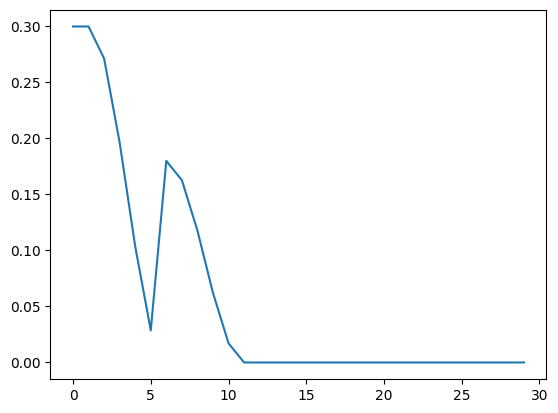

In [24]:
plt.plot(lr_hist)

In [1]:
import pickle

In [2]:
def read_pickle(path):
    return pickle.load(open(path, "rb"))

itemid2time = read_pickle("/home/yeep/project/alqq_generc/data/item_id2_time_dict.pkl")

In [ ]:
for i in 

dict_values([35.80549768518518, 35.673912037037034, 35.66693287037037, 34.5697337962963, 34.648611111111116, 34.58012731481481, 34.549791666666664, 34.50238425925926, 34.46509259259259, 33.299502314814816, 33.27498842592592, 32.62283564814815, 32.60509259259259, 30.778738425925923, 29.763854166666665, 30.65128472222222, 29.838090277777777, 30.57304398148148, 28.820057870370366, 28.819560185185182, 28.780763888888888, 27.638831018518516, 27.614953703703705, 27.589166666666667, 27.544155092592593, 27.503645833333334, 27.500300925925927, 26.853738425925926, 26.850243055555556, 26.83640046296296, 26.518263888888892, 25.734375, 25.745729166666663, 25.53809027777778, 24.746527777777775, 23.891504629629633, 24.656041666666667, 21.751944444444444, 22.498506944444443, 24.59629629629629, 23.78190972222222, 23.750150462962964, 23.745555555555555, 15.247546296296298, 22.02863425925926, 22.38341435185185, 21.760509259259262, 21.402881944444445, 21.005856481481484, 20.649398148148148, 20.60938657407

In [2]:
import jsonlines
json_list = []
with jsonlines.open("/home/yeep/project/alqq_generc/data/test_data/predict_set.jsonl") as reader:
    for item in reader:
        json_list.append(item)

In [4]:
json_list.append(
    {'creative_id': 30000697126,
        'features': {
            '112': 14,
            '117': 80,
            '118': 249,
            '119': 1174,
            '120': 118,
            '100': 6,
            '101': 18,
            '102': 6779,
            '122': 8307,
            '114': 16,
            '116': 6,
            '121': 28737,
            '111': 42338
            }
    })

In [5]:
json_list.append(
    {'creative_id': 40000697126,
        'features': {
            '112': 14,
            '117': 80,
            '118': 249,
            '119': 1174,
            '120': 118,
            '100': 6,
            '101': 18,
            '102': 6779,
            '122': 8307,
            '114': 16,
            '116': 6,
            '121': 28737,
            '111': 42338
            }
    })

In [6]:
json_list.append(
    {'creative_id': 50000697126,
        'features': {
            '112': 14,
            '117': 80,
            '118': 249,
            '119': 1174,
            '120': 118,
            '100': 6,
            '101': 18,
            '102': 6779,
            '122': 8307,
            '114': 16,
            '116': 6,
            '121': 28737,
            '111': 42338
            }
    })

In [8]:
# write json_list using jsonlines
with jsonlines.open("/home/yeep/project/alqq_generc/data/test_data/predict_set.jsonl", "w") as writer:
    for item in json_list:
        writer.write(item)

In [2]:
import pickle
def read_pickle(path):
    return pickle.load(open(path, "rb"))

item_expression_dict = read_pickle("/home/yeep/project/alqq_generc/data/test_data/creative_emb/emb_81_32.pkl")

In [5]:
import numpy as np
item_expression_dict[30000697126] = np.random.randn(32)
item_expression_dict[40000697126] = np.random.randn(32)
item_expression_dict[50000697126] = np.random.randn(32)


In [6]:
# save pickle
with open("/home/yeep/project/alqq_generc/data/test_data/creative_emb/emb_81_32.pkl", "wb") as f:
    pickle.dump(item_expression_dict, f)